# Data preparation 

In [1]:
# ## Import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(color_codes=True)
%matplotlib inline

In [2]:
## Import data
df = pd.read_csv("Data/diab_ckd_data.csv")

In [3]:
## Look at the data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
df.head()

IDS  TIME_CRF  EVENT_CRF  IS_MALE  AGE_AT_SDATE  AGE_GROUP SES_GROUP  \
0  122931      0.05          1        0         72.97   [60, 75)        HI   
1   98909     14.15          0        0         70.30   [60, 75)       MID   
2   65611     19.21          0        0         53.46   [45, 60)       MID   
3   95847     15.82          0        0         81.75  [75, 120)       MID   
4   91914      7.20          0        1         85.35  [75, 120)        HI   

    MIGZAR  IS_HYPERTENSION  SE_HYPERTENSION  IS_ISCHEMIC_MI  SE_ISCHEMIC_MI  \
0  GENERAL                0              NaN               0             NaN   
1  GENERAL                1             6.85               0             NaN   
2   HAREDI                0              NaN               0             NaN   
3  GENERAL                1             5.18               0             NaN   
4  GENERAL                0              NaN               0             NaN   

   IS_CVA_TIA  SE_CVA_TIA  IS_DEMENTIA  SE_DEMENTIA  IS_ART_SCLE_GEN  \
0           0         NaN            0          NaN                0   
1           0         NaN            0          NaN                0   
2           0         NaN            0          NaN                0   
3           0         NaN            0          NaN                0   
4           0         NaN            0          NaN                0   

   SE_ART_SCLE_GEN  IS_TROMBOPHILIA  SE_TROMBOPHILIA  IS_IBD  SE_IBD  \
0              NaN                0              NaN       0     NaN   
1              NaN                0              NaN       0     NaN   
2              NaN                0              NaN       0     NaN   
3              NaN                0              NaN       0     NaN   
4              NaN                0              NaN       0     NaN   

   BMI_AT_BASELINE  SYSTOLA_AT_BASELINE  DIASTOLA_AT_BASELINE  \
0            19.89                122.0                  65.5   
1            41.23                150.0                  85.0   
2              NaN                  NaN                   NaN   
3              NaN                130.0                  80.0   
4            24.45                122.5                  73.0   

   Creatinine_B_AT_BASELINE  Albumin_B_AT_BASELINE  Urea_B_AT_BASELINE  \
0                      1.30                    3.9                71.0   
1                      0.90                    NaN                33.5   
2                       NaN                    NaN                 NaN   
3                      0.85                    NaN                35.0   
4                      0.74                    4.5                50.5   

   Glucose_B_AT_BASELINE  HbA1C_AT_BASELINE  RBCRed_Blood_Cells_AT_BASELINE  \
0                    NaN               9.55                            3.87   
1                  162.5               7.20                            4.96   
2                  137.0               7.85                             NaN   
3                  153.0               7.20                            5.07   
4                  117.5               6.70                            4.74   

   Hemoglobin_AT_BASELINE  Ferritin_AT_BASELINE  AST_GOT_AT_BASELINE  \
0                   11.70                   NaN                 34.0   
1                   12.70                   NaN                 22.5   
2                     NaN                   NaN                  NaN   
3                   14.50                   NaN                106.0   
4                   14.65                 184.5                 21.0   

   ALT_GPT_AT_BASELINE  Bilirubin_Total_AT_BASELINE  Na_Sodium_B_AT_BASELINE  \
0                 22.2                          NaN                    138.5   
1                 24.5                          NaN                    136.5   
2                  NaN                          NaN                      NaN   
3                132.0                          NaN                    140.0   
4                 18.0                        

In [10]:
df.shape

(135475, 43)

## Creating target columns
 DV1 => Time to onset of chronic kidney disease <= 2 years  
 DV2 => Time to onset of chronic kidney disease <= 5 years  
 DV3 => Time to onset of chronic kidney disease <= 10 years  

In [11]:
#Target columns (Dependent variables 1,2 and 3)
DV1Filter = (df.TIME_CRF<=2) & (df.EVENT_CRF==1)
DV2Filter = (df.TIME_CRF<=5) & (df.EVENT_CRF==1)
DV3Filter = (df.TIME_CRF<=10) & (df.EVENT_CRF==1)
df["DV1"] = DV1Filter.astype(int)
df["DV2"] = DV2Filter.astype(int)
df["DV3"] = DV3Filter.astype(int)
#df.head()

## Split data to training and testing data

In [12]:
## Split data
from sklearn.model_selection import train_test_split
df, df_test = train_test_split(df,test_size=0.20,random_state=0,
                                                    stratify=df["DV1"])

# Exploratory data analysis

In [7]:
#df.describe()

IDS       TIME_CRF      EVENT_CRF        IS_MALE  \
count  108380.000000  108380.000000  108380.000000  108380.000000   
mean    67696.072458       8.425859       0.106689       0.571563   
std     39103.414257       5.741732       0.308719       0.494855   
min         1.000000       0.000000       0.000000       0.000000   
25%     33858.250000       3.550000       0.000000       0.000000   
50%     67625.500000       7.530000       0.000000       1.000000   
75%    101609.250000      12.800000       0.000000       1.000000   
max    135475.000000      21.000000       1.000000       1.000000   

        AGE_AT_SDATE  IS_HYPERTENSION  SE_HYPERTENSION  IS_ISCHEMIC_MI  \
count  108380.000000    108380.000000     40726.000000   108380.000000   
mean       56.552209         0.378317         5.791818        0.035283   
std        12.108135         0.484970         4.859552        0.184496   
min        18.020000         0.000000         0.010000        0.000000   
25%        48.410000         0.000000         1.660000        0.000000   
50%        56.480000         0.000000         4.670000        0.000000   
75%        64.900000         1.000000         9.000000        0.000000   
max        99.290000         1.000000        22.830000        1.000000   

       SE_ISCHEMIC_MI     IS_CVA_TIA   SE_CVA_TIA    IS_DEMENTIA  SE_DEMENTIA  \
count     3815.000000  108380.000000  1225.000000  108380.000000   573.000000   
mean         5.837048       0.011312     4.515624       0.005305     3.176021   
std          5.079306       0.105755     4.374792       0.072645     3.226312   
min          0.010000       0.000000     0.010000       0.000000     0.010000   
25%          1.640000       0.000000     0.980000       0.000000     0.670000   
50%          4.730000       0.000000     3.160000       0.000000     2.120000   
75%          8.710000       0.000000     6.650000       0.000000     4.540000   
max         25.430000       1.000000    22.090000       1.000000    16.410000   

       IS_ART_SCLE_GEN  SE_ART_SCLE_GEN  IS_TROMBOPHILIA  SE_TROMBOPHILIA  \
count    108380.000000      1232.000000    108380.000000      1991.000000   
mean          0.011423         4.311631         0.018389         4.533596   
std           0.106266         3.974665         0.134354         4.361315   
min           0.000000         0.010000         0.000000         0.010000   
25%           0.000000         1.280000         0.000000         1.070000   
50%           0.000000         3.090000         0.000000         3.160000   
75%           0.000000         6.260000         0.000000         6.820000   
max           1.000000        20.210000         1.000000        20.500000   

              IS_IBD      SE_IBD  BMI_AT_BASELINE  SYSTOLA_AT_BASELINE  \
count  108380.000000  610.000000     68014.000000         91092.000000   
mean        0.005638    7.127918        31.530945           132.229899   
std         0.074872    5.240870         5.557477            14.558996   
min         0.000000    0.010000        19.250000            90.000000   
25%         0.000000    2.745000        27.595000           121.000000   
50%         0.000000    6.325000        30.850000           130.000000   
75%         0.000000   10.907500        34.835000           140.000000   
max         1.000000   20.640000        51.260000           194.000000   

       DIASTOLA_AT_BASELINE  Creatinine_B_AT_BASELINE  Albumin_B_AT_BASELINE  \
count          91092.000000              98915.000000           66547.000000   
mean              79.525935                  0.850358               4.264735   
std                8.216715                  0.217991               0.303229   
min               51.000000                  0.410000               2.600000   
25%               74.500000                  0.700000               4.100000   
50%               80.000000                  0.825000               4.300000   
75%               84.500000                  0.980000               4.500000 

 ##  Missing values

Number of columns with missing data: 28


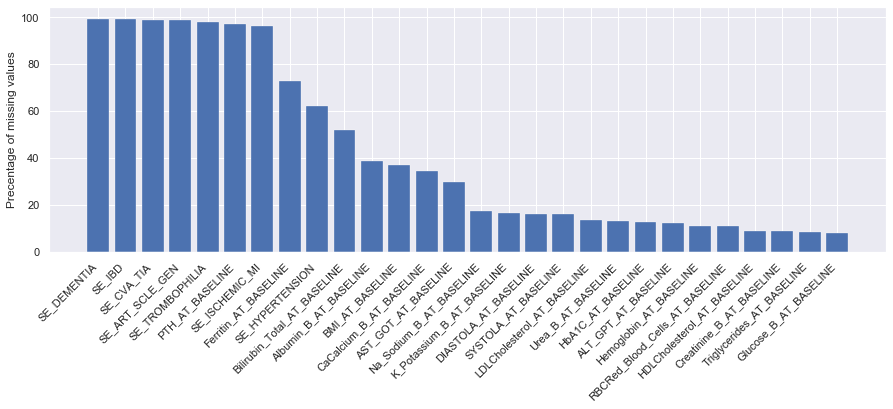

In [8]:
## Missing values
null_df = df.isnull().sum() * 100 / len(df)
null_df.sort_values(ascending=False, inplace=True)
null_df = null_df[null_df.values!=0] # Removing columns without missing values
fig, ax = plt.subplots(figsize= (15,5))
plt.style.use("seaborn")
ax.bar(null_df.index, null_df.values)
fig.autofmt_xdate(rotation=45)
ax.set_ylabel("Precentage of missing values")
print("Number of columns with missing data: {}".format(null_df.size))
plt.show()

Key insights:
- High numbers of of missing data values for all SE columns (Time past since...) We have no values if  patients  didnt have the clinical parameter (parallel IS value=0).  

- Blood test values: From previous knowledge data is not missing at random, it depends on the patients health and behavioral patterns.  
- PTH_AT_BASELINE, Ferritin_AT_BASELINE, BILIRUBIN_Total_AT_BASELINE, ALBUMIN_B_AT_BASELINE: Tests that are probably done only if patience is showing symptoms.

## Target columns

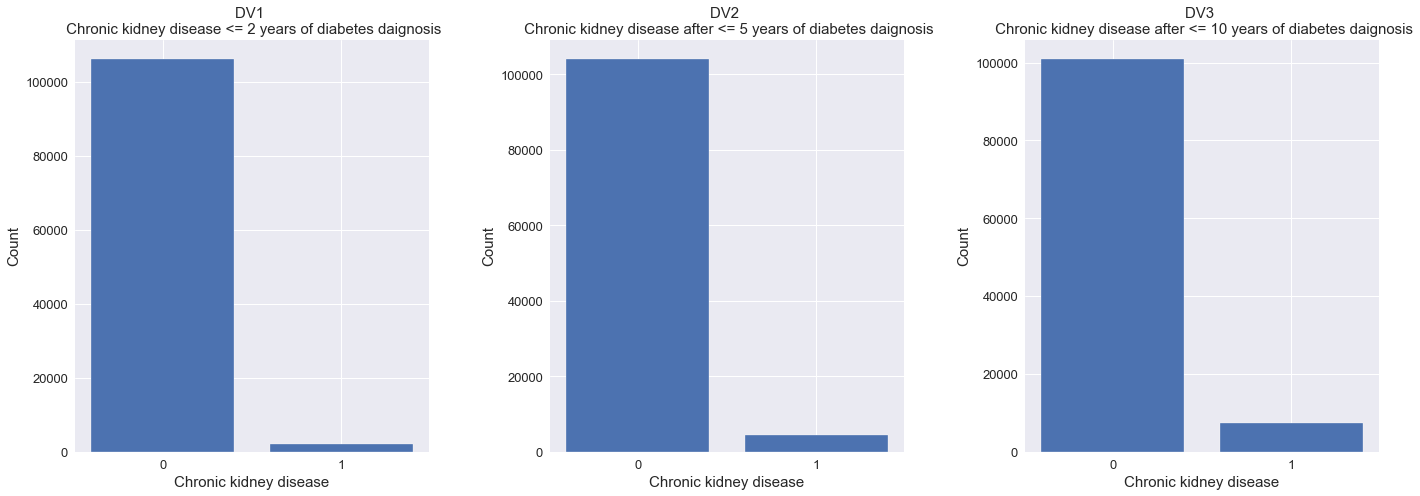

In [20]:
## Target columns
a1 = df["DV1"].value_counts()
a2 = df["DV2"].value_counts()
a3 = df["DV3"].value_counts()

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,7))
ax1.bar(a1.index, a1.values)
ax1.set_xticks([0,1])
ax1.set_xlabel("Chronic kidney disease", fontsize=15)
ax1.set_ylabel("Count", fontsize=15)
ax1.set_title("DV1 \n Chronic kidney disease <= 2 years of diabetes daignosis", fontsize=15)
ax1.tick_params(axis='both', which='major', labelsize=13)

ax2.bar(a2.index, a2.values)
ax2.set_xticks([0,1])
ax2.set_xlabel("Chronic kidney disease", fontsize=15)
ax2.set_ylabel("Count", fontsize=15)
ax2.set_title("DV2 \n Chronic kidney disease after <= 5 years of diabetes daignosis", fontsize=15)
ax2.tick_params(axis='both', which='major', labelsize=13)

ax3.bar(a3.index, a3.values)
ax3.set_xticks([0,1])
ax3.set_xlabel("Chronic kidney disease", fontsize=15)
ax3.set_ylabel("Count", fontsize=15)
ax3.set_title("DV3 \n Chronic kidney disease after <= 10 years of diabetes daignosis", fontsize=15)
ax3.tick_params(axis='both', which='major', labelsize=13)

plt.tight_layout()
plt.show()

Key insights:
- Target columns are unbalanced
- Rebalancing should be concider **DONE**

##### To simplify presentation we will focus only on DV1

In [69]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108380 entries, 1774 to 56689
Data columns (total 46 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   IDS                             108380 non-null  int64  
 1   TIME_CRF                        108380 non-null  float64
 2   EVENT_CRF                       108380 non-null  int64  
 3   IS_MALE                         108380 non-null  int64  
 4   AGE_AT_SDATE                    108380 non-null  float64
 5   AGE_GROUP                       108380 non-null  object 
 6   SES_GROUP                       108380 non-null  object 
 7   MIGZAR                          108380 non-null  object 
 8   IS_HYPERTENSION                 108380 non-null  int64  
 9   SE_HYPERTENSION                 40726 non-null   float64
 10  IS_ISCHEMIC_MI                  108380 non-null  int64  
 11  SE_ISCHEMIC_MI                  3815 non-null    float64
 12  IS_CVA_TIA    

Key insights: (In combenation with metadata)  
 Numerical data:  
     'BMI_AT_BASELINE', 'SYSTOLA_AT_BASELINE', 'DIASTOLA_AT_BASELINE',  
       'Creatinine_B_AT_BASELINE', 'Albumin_B_AT_BASELINE',  
       'Urea_B_AT_BASELINE', 'Glucose_B_AT_BASELINE', 'HbA1C_AT_BASELINE',  
       'RBCRed_Blood_Cells_AT_BASELINE', 'Hemoglobin_AT_BASELINE',  
       'Ferritin_AT_BASELINE', 'AST_GOT_AT_BASELINE', 'ALT_GPT_AT_BASELINE',  
       'Bilirubin_Total_AT_BASELINE', 'Na_Sodium_B_AT_BASELINE',  
       'K_Potassium_B_AT_BASELINE', 'CaCalcium_B_AT_BASELINE',  
       'HDLCholesterol_AT_BASELINE', 'LDLCholesterol_AT_BASELINE',  
       'Triglycerides_AT_BASELINE', 'PTH_AT_BASELINE', 'SE_HYPERTENSION',  
       'SE_ISCHEMIC_MI', 'SE_CVA_TIA','SE_DEMENTIA','SE_ART_SCLE_GEN',  
       'SE_TROMBOPHILIA','SE_IBD', 'AGE_AT_SDATE' 
     
 Categorical data:  
     Encoded:  
     'IS_MALE', 'IS_HYPERTENSION', 'IS_ISCHEMIC_MI','IS_CVA_TIA','IS_DEMENTIA',  
     'IS_ART_SCLE_GEN','IS_TROMBOPHILIA','IS_IBD'  
     Not encoded:  
     'AGE_GROUP', 'SES_GROUP', 'MIGZAR'
     
 


## Data distribution 

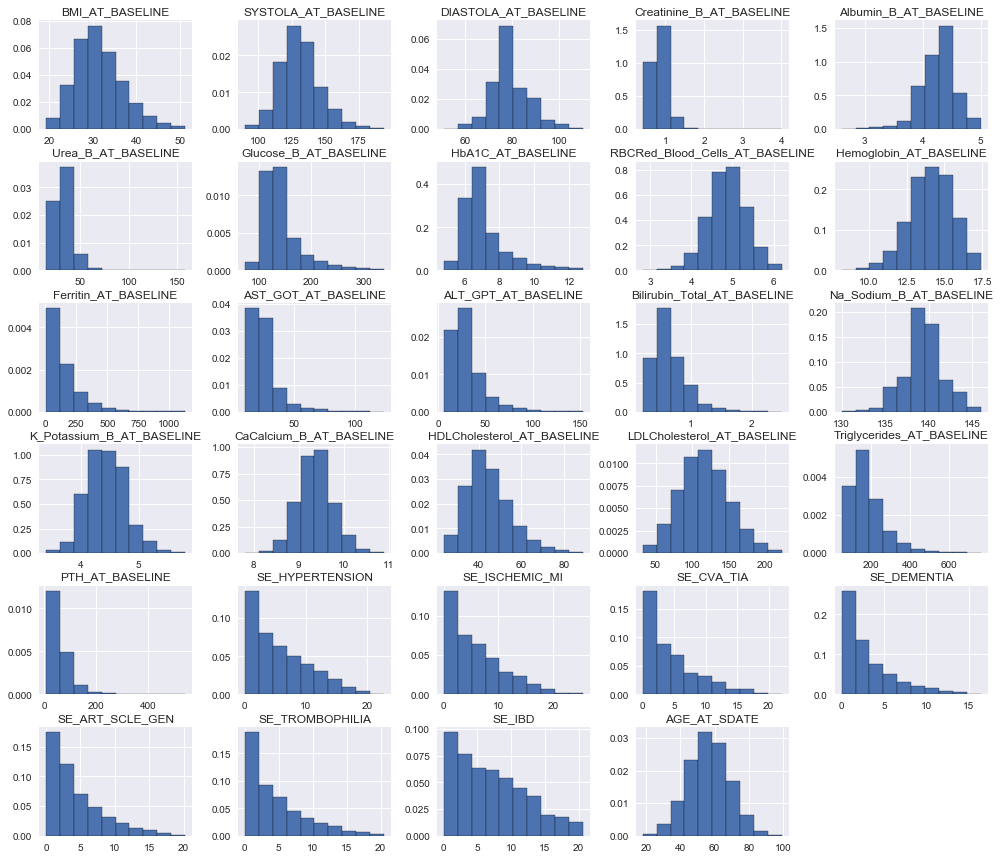

In [21]:
#Plot histograms of all numerical features 
Numerical = ['BMI_AT_BASELINE', 'SYSTOLA_AT_BASELINE', 'DIASTOLA_AT_BASELINE',
       'Creatinine_B_AT_BASELINE', 'Albumin_B_AT_BASELINE',
       'Urea_B_AT_BASELINE', 'Glucose_B_AT_BASELINE', 'HbA1C_AT_BASELINE',
       'RBCRed_Blood_Cells_AT_BASELINE', 'Hemoglobin_AT_BASELINE',
       'Ferritin_AT_BASELINE', 'AST_GOT_AT_BASELINE', 'ALT_GPT_AT_BASELINE',
       'Bilirubin_Total_AT_BASELINE', 'Na_Sodium_B_AT_BASELINE',
       'K_Potassium_B_AT_BASELINE', 'CaCalcium_B_AT_BASELINE',
       'HDLCholesterol_AT_BASELINE', 'LDLCholesterol_AT_BASELINE',
       'Triglycerides_AT_BASELINE', 'PTH_AT_BASELINE', 'SE_HYPERTENSION',
             'SE_ISCHEMIC_MI', 'SE_CVA_TIA','SE_DEMENTIA','SE_ART_SCLE_GEN',
             'SE_TROMBOPHILIA','SE_IBD', 'AGE_AT_SDATE']
plt.style.use("seaborn-dark")
df[Numerical].hist(figsize=(17,15),  edgecolor='black', density=True)
plt.show()

Key insights:  
- Data is partially skewed   
    Right skew columns- 'Creatinine_B_AT_BASELINE','Urea_B_AT_BASELINE',
    'Glucose_B_AT_BASELINE', 'HbA1C_AT_BASELINE', 'Ferritin_AT_BASELINE', 
    'AST_GOT_AT_BASELINE', 'ALT_GPT_AT_BASELINE','Bilirubin_Total_AT_BASELINE',
    'HDLCholesterol_AT_BASELINE', 'Triglycerides_AT_BASELINE', 'PTH_AT_BASELINE',
    'SE_HYPERTENSION', 'SE_ISCHEMIC_MI', 'SE_CVA_TIA', 'SE_DEMENTIA',
    'SE_ART_SCLE_GEN', 'SE_TROMBOPHILIA', 'SE_IBD'  
    Left skew columns- 'Albumin_B_AT_BASELINE'
- Data is not scaled  

## Looking for outliers

In [22]:
## Filtering numerical data by max values for better visualisation 
df_numerical = df[Numerical]
filt = df_numerical.max()<10
box_less10_col = [i for i in filt.index if filt[i]]
filt = (df_numerical.max()>=10) & (df_numerical.max()<100)
box_less100_col = [i for i in filt.index if filt[i]]
filt = (df_numerical.max()>=100) & (df_numerical.max()<500)
box_less500_col = [i for i in filt.index if filt[i]]
filt = (df_numerical.max()>=500)
box_more500_col = [i for i in filt.index if filt[i]]                                     

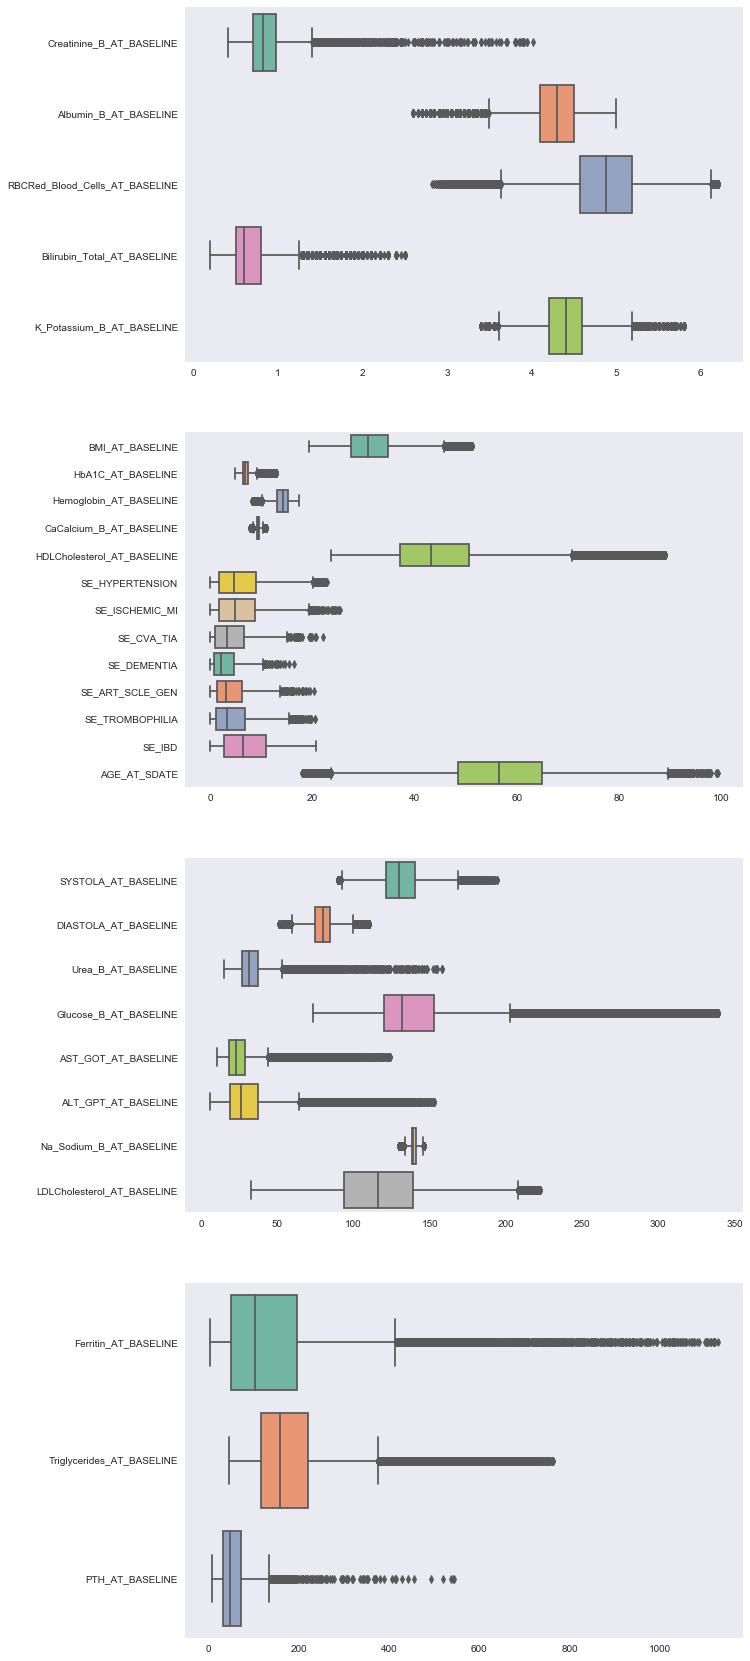

In [23]:
# Plot the orbital period with horizontal boxes
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(10,30))
sns.boxplot(data=df[box_less10_col], orient="h", palette="Set2", ax=ax1)
sns.boxplot(data=df[box_less100_col], orient="h", palette="Set2", ax=ax2)
sns.boxplot(data=df[box_less500_col], orient="h", palette="Set2", ax=ax3)
sns.boxplot(data=df[box_more500_col], orient="h", palette="Set2", ax=ax4)
plt.show()


In [4]:
# Another option to plot
# fig = plt.figure(figsize=(16,50))
# for i in range(len(df[Numerical].columns)):
#     fig.add_subplot(8,4,i+1)
#     sns.boxplot(y=df[Numerical].iloc[:,i])
# plt.tight_layout()
# plt.show()

Key insights:  
Most numerical variables contain high numbers of outliars  
Potnatial solutions depends on the model we choose:
- Keep them as they are  
- Flag the outliers(will double the amount of columns)
- Drop rows
    

## Correlation matrix- numerical data with DV1

In [24]:
#Correlation matrix of numerical data - before imputation
corrMatrix = df[Numerical +["DV1"]].corr()

### Heatmap

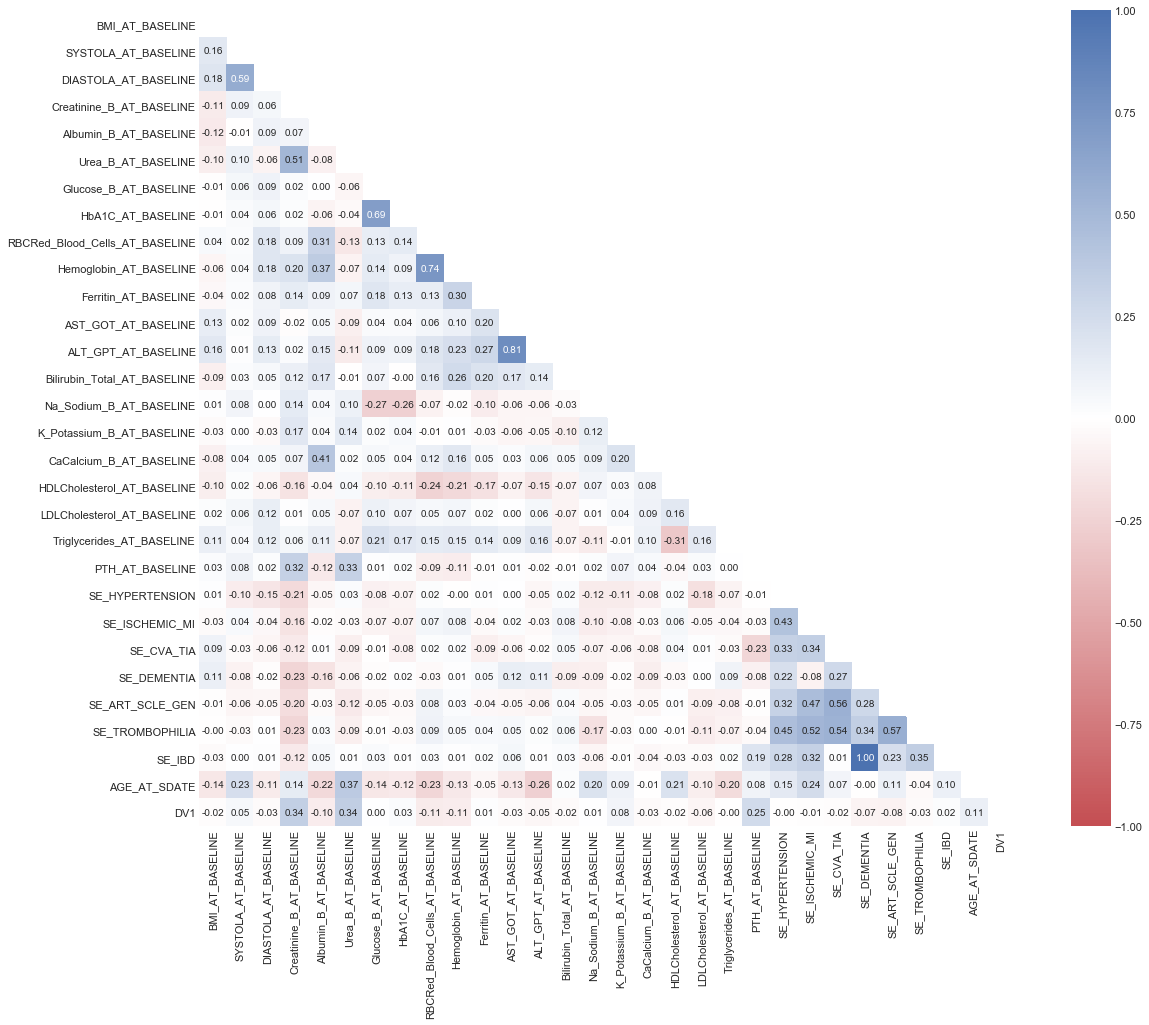

In [12]:
## Heatmap
from matplotlib.colors import LinearSegmentedColormap
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 15))
    ax = sns.heatmap(corrMatrix, mask=mask, square=True,
                     cmap=LinearSegmentedColormap.from_list('rb',["r", "w", "b"],N=256),
                    annot=True, vmin=-1, vmax=1, fmt='.2f')
    # plt.savefig("corr_matrix.png")
plt.show()


Key insights:  
We can see some direct linear correlation between Creatinine_B_AT_BASELINE, UREA_B_AT_BASELINE and PTH_B_AT_BASELINE to our dependent variable.    
We will further explore the correlation found between the diffrent variables using known knowladge on data from literature to discovre knew insights. 

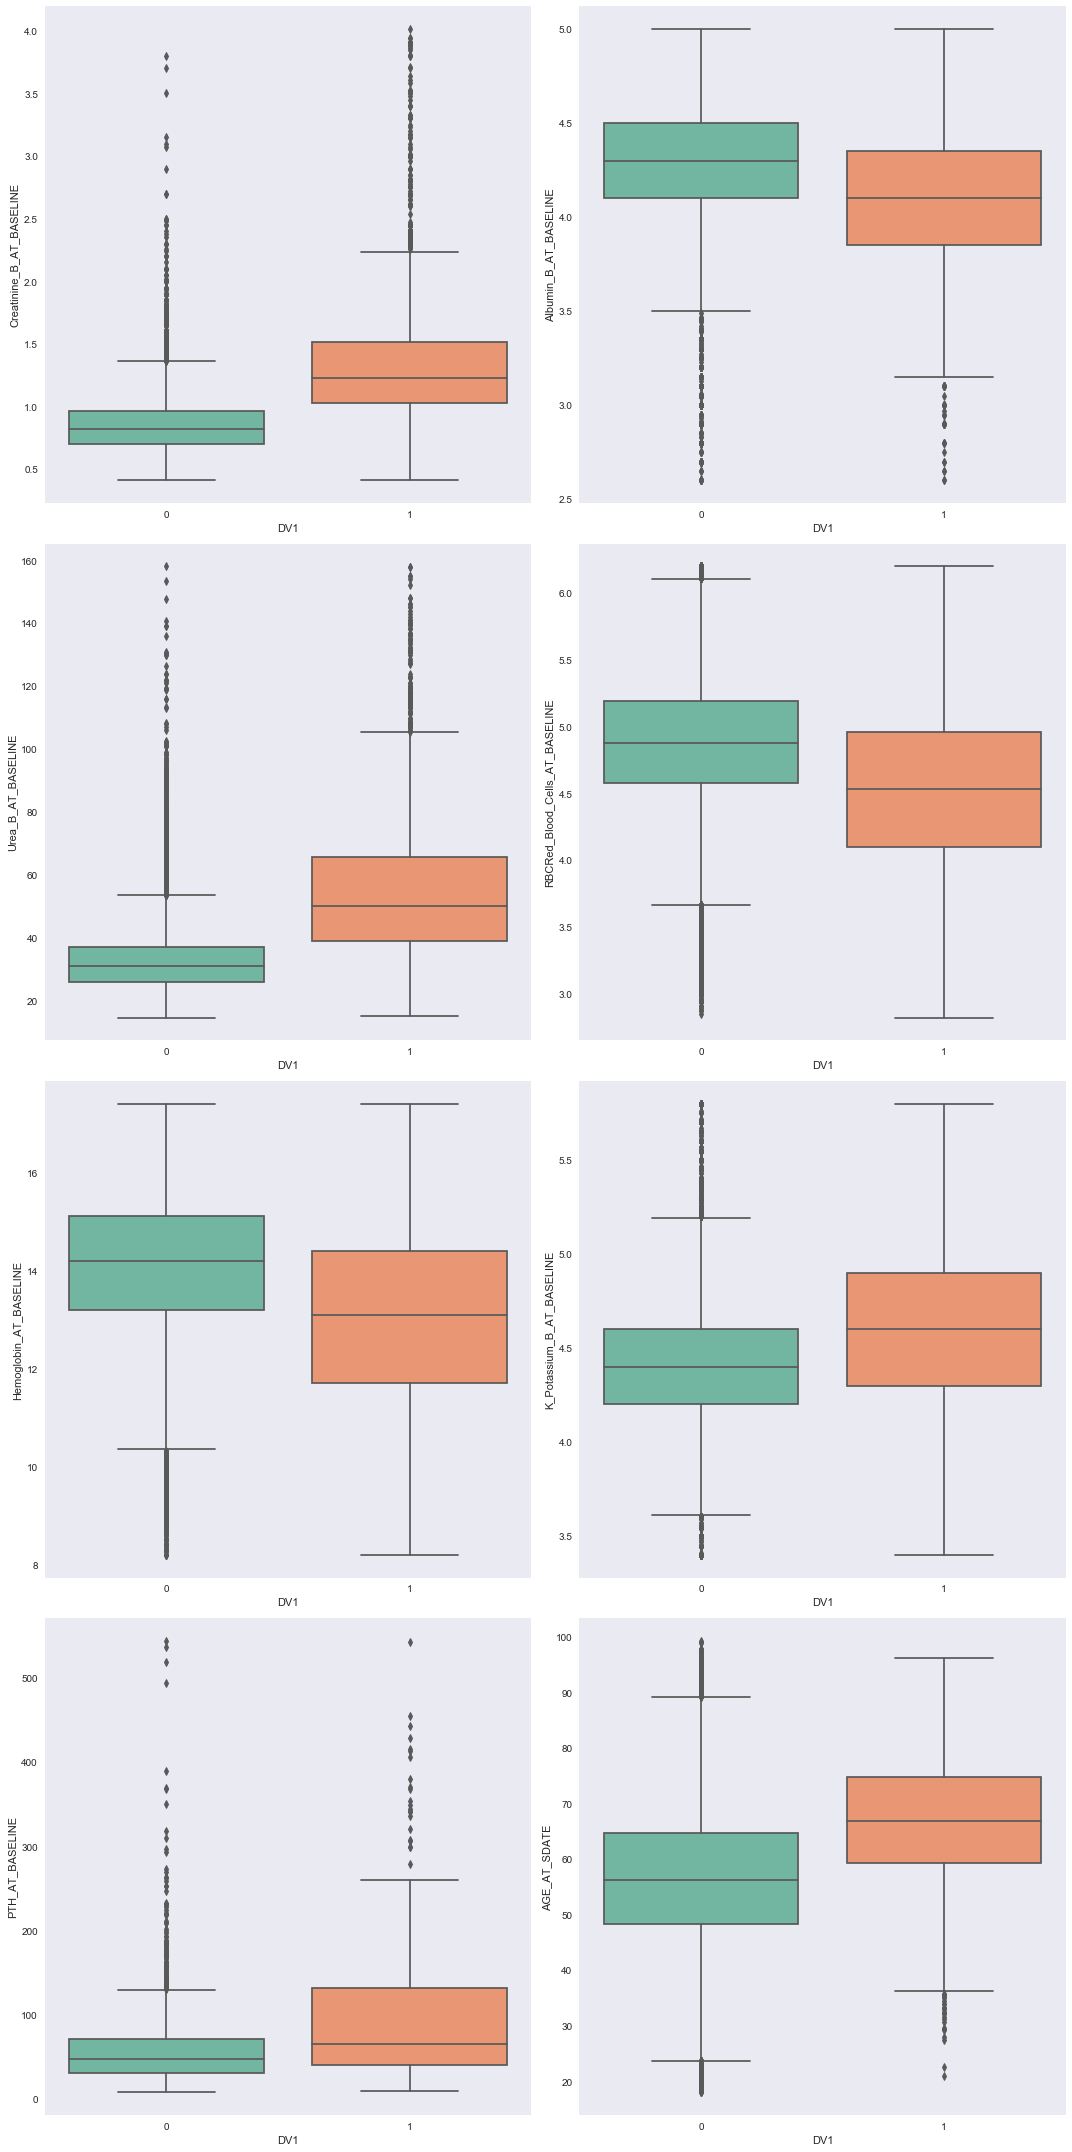

In [26]:
## Box plots of high correlated features by DV1 (Creatinine, Albumin, Urea, RBCRed, Hemoglobin, K_potassium, PTH, AGE)
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4,2, figsize=(15,30))
sns.boxplot(x='DV1', y='Creatinine_B_AT_BASELINE', data=df, palette="Set2", ax=ax1)
sns.boxplot(x='DV1', y='Albumin_B_AT_BASELINE', data=df, palette="Set2", ax=ax2)
sns.boxplot(x='DV1', y='Urea_B_AT_BASELINE', data=df, palette="Set2", ax=ax3)
sns.boxplot(x='DV1', y='RBCRed_Blood_Cells_AT_BASELINE', data=df, palette="Set2", ax=ax4)
sns.boxplot(x='DV1', y='Hemoglobin_AT_BASELINE', data=df, palette="Set2", ax=ax5)
sns.boxplot(x='DV1', y='K_Potassium_B_AT_BASELINE', data=df, palette="Set2", ax=ax6)
sns.boxplot(x='DV1', y='PTH_AT_BASELINE', data=df, palette="Set2", ax=ax7)
sns.boxplot(x='DV1', y='AGE_AT_SDATE', data=df, palette="Set2", ax=ax8)

plt.tight_layout()
plt.show()

## Risk factors for Diabetic Nephropathy (1): 
 - glucose levels
 - high blood pressure
 - obesity
 - dyslipidemia
 - oxidative stress
 - long duration of diabetes
 - cystatin-C levels and creatinine evaluating renal function
 
* Measurement of cystatin-C levels is more specific than creatinine for evaluating 
renal function, but it is more costly

* Oxidative stress can be measured indirectly by measuring the levels of DNA/RNA damage, lipid peroxidation, and protein oxidation/nitration, rather than a direct measurement of reactive oxygen species.

(1) Diabetic Nephropathy: 
New Risk Factors and Improvements in Diagnosis [Konstantinos Tziomalos1
, Vasilios G. Athyros]

### Glucose levels
Normal blood glucose level (while fasting) range within 70 to 99 mg/dL (3.9 to 5.5 mmol/L). Higher ranges could indicate pre-diabetes or diabetes. [https://my.clevelandclinic.org/health/diagnostics/12363-blood-glucose-test]  
  
"In patients with both T1D and T2D, high HbA1c levels are associated with an increased risk for developing nephropathy.
Indeed, in the Diabetes Control and Complications Trial/Epidemiologs (DCCT/EDIC) study, patients with moderate albuminuria, but lower HbA1c levels, had a lower risk for rogressing to severe albuminuria or ESRD."

Relevant variables:   
Glucose_B_AT_BASELINE   
Albumin_B_AT_BASELINE vs HbA1C_AT_BASELINE

also correlated with:    
HbA1C_AT_BASELINE  
Triglycerides_AT_BASELINE  
Ferritin_AT_BASELINE  
Hemoglobin_AT_BASELINE  
RBCRed_Blood_Cells_AT_BASELINE  
LDLCholesterol_AT_BASELINE  
Na_Sodium_B_AT_BASELINE (-)  
AGE_AT_SDATE (-)  
HDLCholesterol_AT_BASELINE (-)

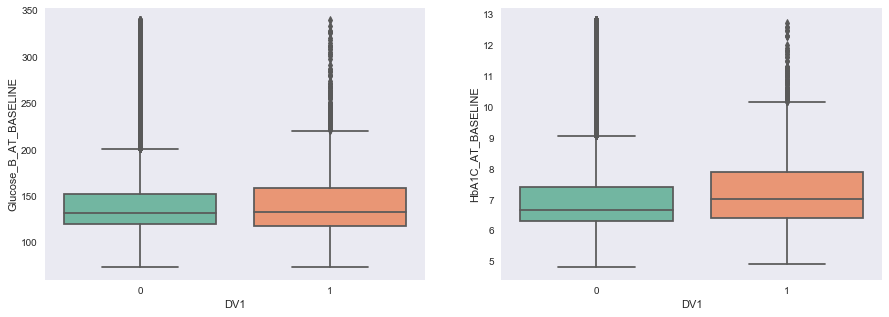

In [15]:
## Plot Glucose_B_AT_BASELINE and HbA1C_AT_BASELINE
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(x='DV1', y='Glucose_B_AT_BASELINE', data=df, palette="Set2", ax=ax1)
sns.boxplot(x='DV1', y='HbA1C_AT_BASELINE', data=df, palette="Set2", ax=ax2)
plt.show()

In [19]:
# Anova test
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Ordinary Least Squares (OLS) model
model = ols('Glucose_B_AT_BASELINE ~ C(DV1)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("Glucose_B_AT_BASELINE")
print(anova_table)

model2 = ols('HbA1C_AT_BASELINE ~ C(DV1)', data=df).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)
print("\nHbA1C_AT_BASELINE")
print(anova_table2)

Glucose_B_AT_BASELINE
                sum_sq       df         F    PR(>F)
C(DV1)    1.630180e+02      1.0  0.101098  0.750516
Residual  1.609615e+08  99823.0       NaN       NaN

HbA1C_AT_BASELINE
                 sum_sq       df          F        PR(>F)
C(DV1)       123.689217      1.0  73.079491  1.263473e-17
Residual  160301.190331  94711.0        NaN           NaN


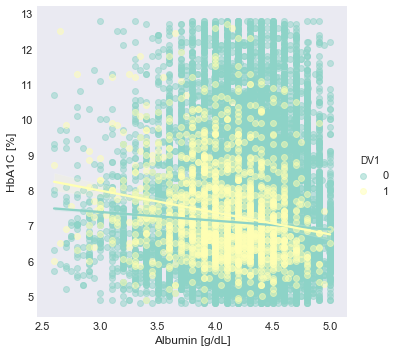

In [37]:
## Albumin_B_AT_BASELINE vs HbA1C_AT_BASELINE
sns.lmplot(data=df, x="Albumin_B_AT_BASELINE", y="HbA1C_AT_BASELINE", hue="DV1",
          scatter_kws={'alpha':0.5}, palette="Set3")
plt.ylabel("HbA1C [%]")
plt.xlabel("Albumin [g/dL]")
plt.show()

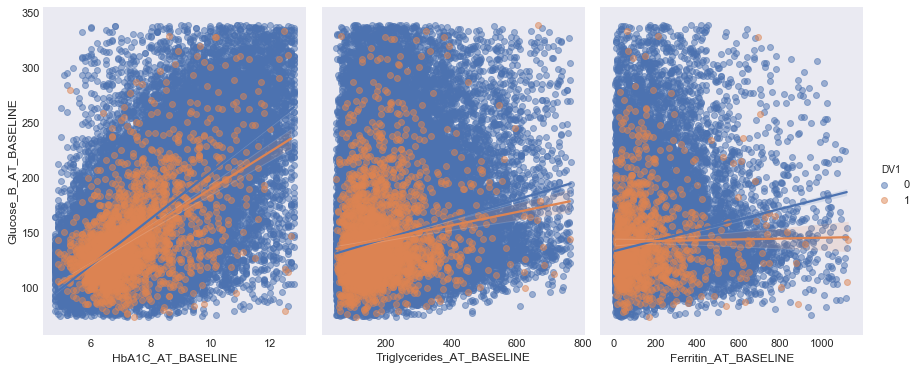

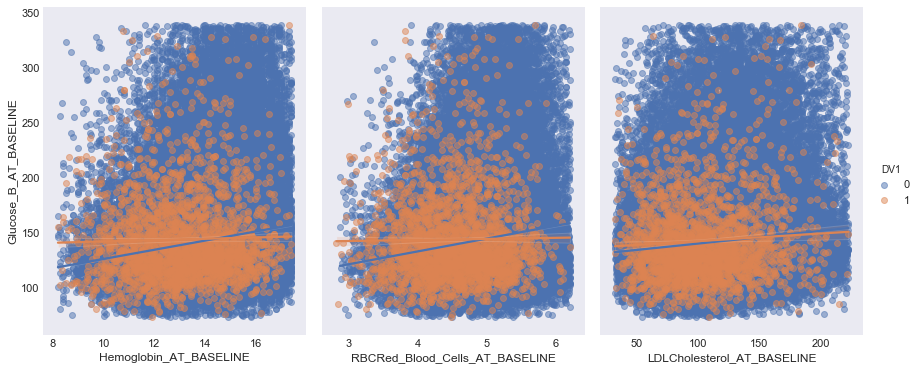

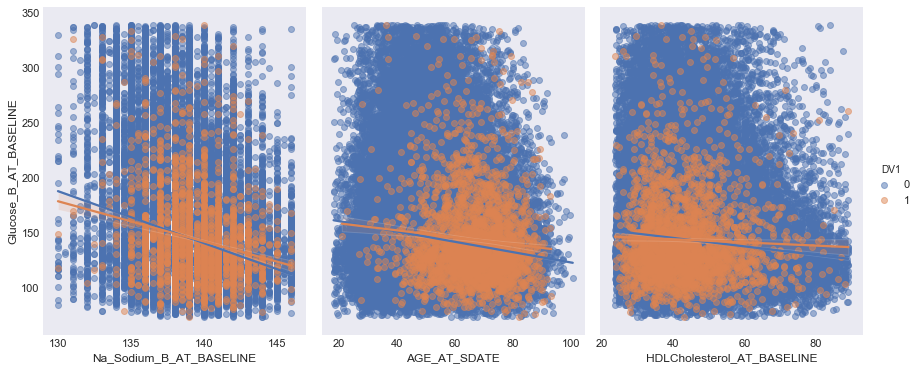

In [23]:
## Pair plots glucose with correlated variables
Glucose_pair_names = ["Glucose_B_AT_BASELINE", "HbA1C_AT_BASELINE", "Triglycerides_AT_BASELINE",
             "Ferritin_AT_BASELINE", "Hemoglobin_AT_BASELINE","RBCRed_Blood_Cells_AT_BASELINE",
             "LDLCholesterol_AT_BASELINE", "Na_Sodium_B_AT_BASELINE","AGE_AT_SDATE",
             "HDLCholesterol_AT_BASELINE", "DV1"]

sns.pairplot(df[Glucose_pair_names],y_vars=['Glucose_B_AT_BASELINE'],
                  x_vars=["HbA1C_AT_BASELINE", "Triglycerides_AT_BASELINE",
             "Ferritin_AT_BASELINE"],hue='DV1', height=5, aspect=0.8, kind="reg",
             plot_kws={'scatter_kws': {'alpha': 0.5}}
           )
sns.pairplot(df[Glucose_pair_names],y_vars=['Glucose_B_AT_BASELINE'],
                  x_vars=["Hemoglobin_AT_BASELINE","RBCRed_Blood_Cells_AT_BASELINE",
             "LDLCholesterol_AT_BASELINE"],hue='DV1', height=5, aspect=0.8,
             kind="reg",
             plot_kws={'scatter_kws': {'alpha': 0.5}})
sns.pairplot(df[Glucose_pair_names],y_vars=['Glucose_B_AT_BASELINE'],
                  x_vars=["Na_Sodium_B_AT_BASELINE","AGE_AT_SDATE",
             "HDLCholesterol_AT_BASELINE"],hue='DV1', height=5, aspect=0.8,
             kind="reg",
             plot_kws={'scatter_kws': {'alpha': 0.5}})


plt.show()

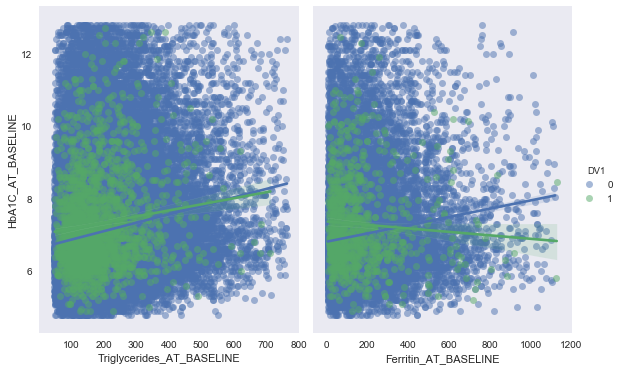

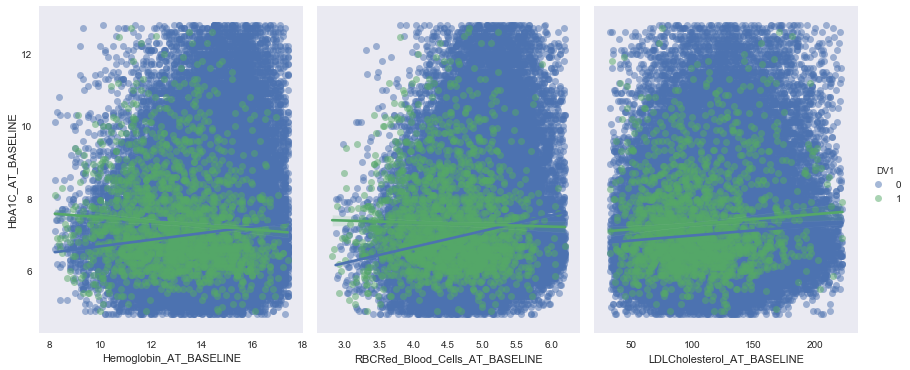

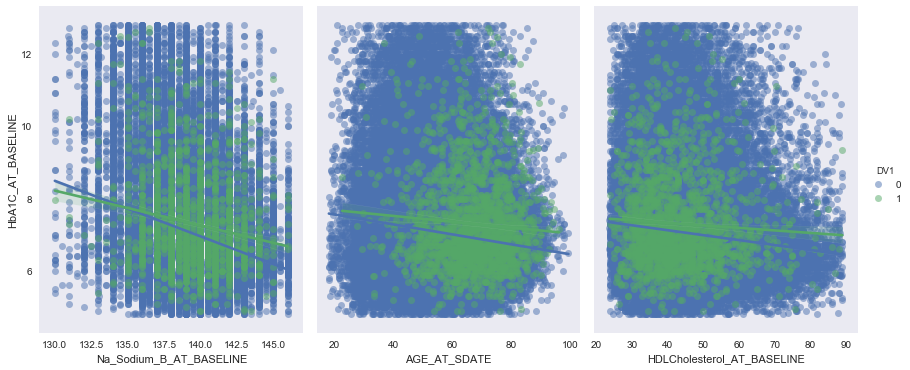

In [35]:
## Pair plots HbA1C_AT_BASELINE with correlated variables
Glucose_pair_names = ["Glucose_B_AT_BASELINE", "HbA1C_AT_BASELINE", "Triglycerides_AT_BASELINE",
             "Ferritin_AT_BASELINE", "Hemoglobin_AT_BASELINE","RBCRed_Blood_Cells_AT_BASELINE",
             "LDLCholesterol_AT_BASELINE", "Na_Sodium_B_AT_BASELINE","AGE_AT_SDATE",
             "HDLCholesterol_AT_BASELINE", "DV1"]

sns.pairplot(df[Glucose_pair_names],y_vars=['HbA1C_AT_BASELINE'],
                  x_vars=[ "Triglycerides_AT_BASELINE",
             "Ferritin_AT_BASELINE"],hue='DV1', height=5, aspect=0.8, kind="reg",
             plot_kws={'scatter_kws': {'alpha': 0.5}}
           )
sns.pairplot(df[Glucose_pair_names],y_vars=['HbA1C_AT_BASELINE'],
                  x_vars=["Hemoglobin_AT_BASELINE","RBCRed_Blood_Cells_AT_BASELINE",
             "LDLCholesterol_AT_BASELINE"],hue='DV1', height=5, aspect=0.8,
             kind="reg",
             plot_kws={'scatter_kws': {'alpha': 0.5}})
sns.pairplot(df[Glucose_pair_names],y_vars=['HbA1C_AT_BASELINE'],
                  x_vars=["Na_Sodium_B_AT_BASELINE","AGE_AT_SDATE",
             "HDLCholesterol_AT_BASELINE"],hue='DV1', height=5, aspect=0.8,
             kind="reg",
             plot_kws={'scatter_kws': {'alpha': 0.5}})


plt.show()

Key insights:
Most patients had high Glucose levels, make sense due to the fact they all were diagnosed with diabetes.
The difference between the DV1 groups in relationship to Glucose levels is not statistically significant.

###  High blood pressure
SYSTOLA_AT_BASELINE  
DIASTOLA_AT_BASELINE  
  
Normal 	systolic: less than 120 mm Hg  
        diastolic: less than 80 mm Hg  
At Risk (prehypertension) 	systolic: 120–139 mm Hg  
                            diastolic: 80–89 mm Hg  
High Blood Pressure (hypertension) 	systolic: 140 mm Hg or higher  
                                    diastolic: 90 mm Hg or higher  

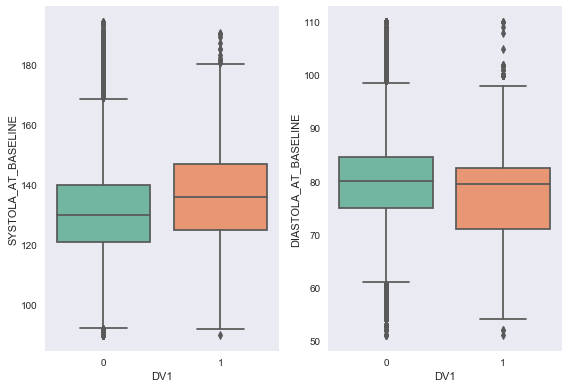

In [36]:
## Plot SYSTOLA and DIASTOLA
fig, (ax1, ax2) = plt.subplots(1,2)
sns.boxplot(x='DV1', y='SYSTOLA_AT_BASELINE',palette="Set2", data=df, ax= ax1)
sns.boxplot(x='DV1', y='DIASTOLA_AT_BASELINE', data=df, palette="Set2", ax= ax2)
plt.tight_layout()
plt.show()

In [39]:
# ANOVA test
# Ordinary Least Squares (OLS) model
model1 = ols('SYSTOLA_AT_BASELINE ~ C(DV1)', data=df).fit()
anova_table1 = sm.stats.anova_lm(model1, typ=2)
model2 = ols('DIASTOLA_AT_BASELINE ~ C(DV1)', data=df).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)
print("SYSTOLA_AT_BASELINE ~ DV1")
print(anova_table1)
print('\nDIASTOLA_AT_BASELINE ~ DV1')
print(anova_table2)

SYSTOLA_AT_BASELINE ~ DV1
                sum_sq       df           F        PR(>F)
C(DV1)    4.390895e+04      1.0  207.622389  5.109791e-47
Residual  1.926414e+07  91090.0         NaN           NaN

DIASTOLA_AT_BASELINE ~ DV1
                sum_sq       df          F        PR(>F)
C(DV1)    4.719842e+03      1.0  69.961593  6.131124e-17
Residual  6.145235e+06  91090.0        NaN           NaN


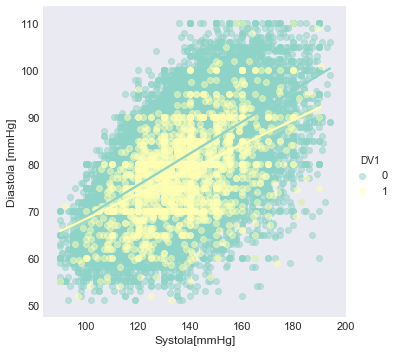

In [41]:
sns.lmplot(x="SYSTOLA_AT_BASELINE", y = "DIASTOLA_AT_BASELINE", data=df, hue='DV1',
          scatter_kws={'alpha':0.5},palette="Set3")
plt.ylabel("Diastola [mmHg]")
plt.xlabel("Systola[mmHg]")

plt.show()

Key insights:
Statistically significant effect of systolic and diastolic on DV1. 
  
Feature enginnering:  
systolic: less than 120 mm Hg  
        diastolic: less than 80 mm Hg  

### Obesity
BMI_AT_BASELINE  
vs  
DIASTOLA_AT_BASELINE              0.180722  
ALT_GPT_AT_BASELINE               0.158563   
SYSTOLA_AT_BASELINE               0.157893    
AST_GOT_AT_BASELINE               0.125870  
Triglycerides_AT_BASELINE         0.115035  
AGE_AT_SDATE                     -0.137824  
Albumin_B_AT_BASELINE            -0.121992  
Creatinine_B_AT_BASELINE         -0.109666  
HDLCholesterol_AT_BASELINE       -0.102953  
  
(Wikipadia)  
Any BMI ≥ 35 or 40 kg/m2 is severe obesity.  
A BMI of ≥ 35 kg/m2 and experiencing obesity-related health conditions or ≥ 40 or 45 kg/m2 is morbid obesity.  
A BMI of ≥ 45 or 50 kg/m2 is super obesity.

In [86]:
# corrMatrix.BMI_AT_BASELINE.sort_values(ascending=False)

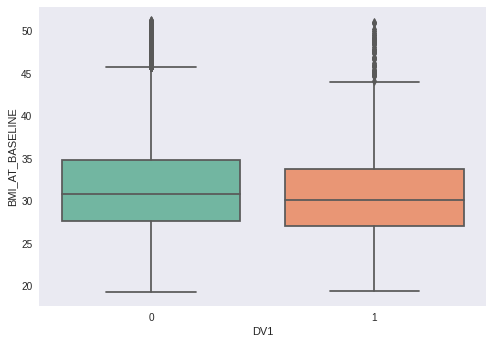

In [87]:
sns.boxplot(x='DV1', y='BMI_AT_BASELINE', data=df, palette="Set2")
plt.show()

In [88]:
# get ANOVA table as R like output
# Ordinary Least Squares (OLS) model
model = ols('BMI_AT_BASELINE ~ C(DV1)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq       df          F        PR(>F)
C(DV1)    9.784174e+02      1.0  31.573881  1.925926e-08
Residual  2.638582e+06  85148.0        NaN           NaN

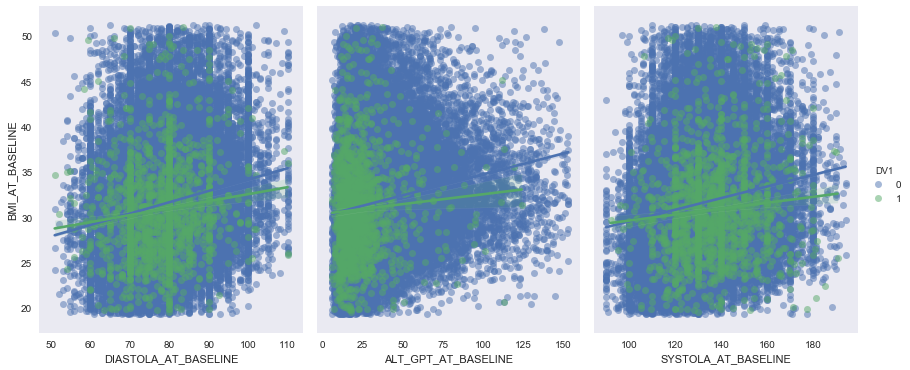

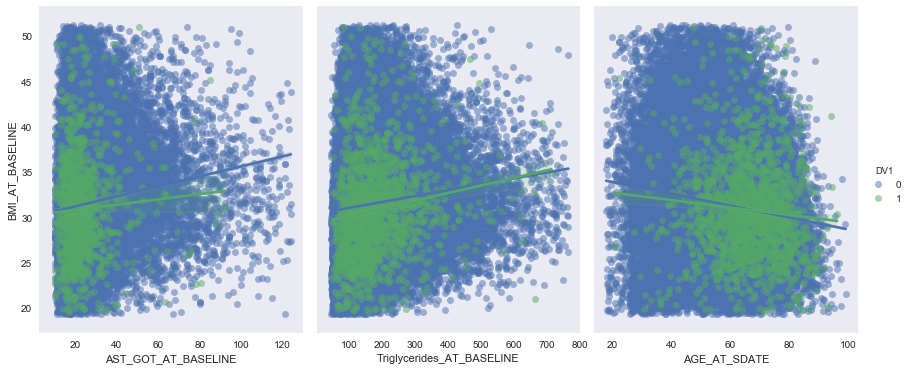

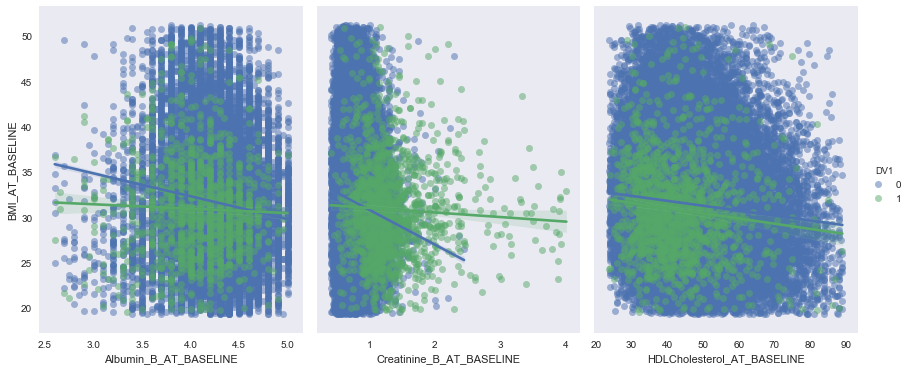

In [75]:
## BMI
BMI_pair_names = ["BMI_AT_BASELINE","DIASTOLA_AT_BASELINE","ALT_GPT_AT_BASELINE",
                      "SYSTOLA_AT_BASELINE","AST_GOT_AT_BASELINE",
                      "Triglycerides_AT_BASELINE","AGE_AT_SDATE",
                      "Albumin_B_AT_BASELINE","Creatinine_B_AT_BASELINE",
                      "HDLCholesterol_AT_BASELINE",  "DV1"]

sns.pairplot(df[BMI_pair_names],y_vars=['BMI_AT_BASELINE'],
                  x_vars=["DIASTOLA_AT_BASELINE","ALT_GPT_AT_BASELINE",
                      "SYSTOLA_AT_BASELINE"],hue='DV1', height=5, aspect=0.8,
              kind="reg",
             plot_kws={'scatter_kws': {'alpha': 0.5}})
sns.pairplot(df[BMI_pair_names],y_vars=['BMI_AT_BASELINE'],
                  x_vars=["AST_GOT_AT_BASELINE",
                      "Triglycerides_AT_BASELINE","AGE_AT_SDATE"],hue='DV1', height=5, aspect=0.8,
             kind="reg",
             plot_kws={'scatter_kws': {'alpha': 0.5}})
sns.pairplot(df[BMI_pair_names],y_vars=['BMI_AT_BASELINE'],
                  x_vars=["Albumin_B_AT_BASELINE","Creatinine_B_AT_BASELINE",
                      "HDLCholesterol_AT_BASELINE"],hue='DV1', height=5, aspect=0.8,
              kind="reg",
             plot_kws={'scatter_kws': {'alpha': 0.5}})


plt.show()

Key insights:  



### Dyslipidemia
Dyslipidemia is elevation of plasma cholesterol, triglycerides (TGs), or both, or a low high-density lipoprotein cholesterol level that contributes to the development of atherosclerosis.    

lowering LDL-C levels is associated with delayed progression of the disease
Your LDL levels should be around 100 mg/dL.  
Less than 120 mg/dL total cholesterol or an LDL level less than 50 mg/dL is very low.
HDLCholesterol_AT_BASELINE  
LDLCholesterol_AT_BASELINE  
Triglycerides_AT_BASELINE  

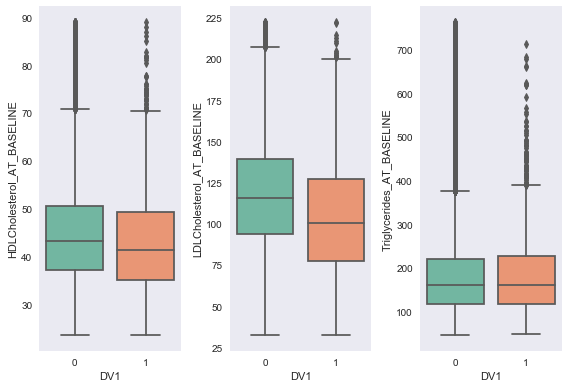

In [42]:
## plot Dyslipidemia related variables
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
sns.boxplot(x='DV1', y='HDLCholesterol_AT_BASELINE',palette="Set2", data=df, ax= ax1)
sns.boxplot(x='DV1', y='LDLCholesterol_AT_BASELINE', data=df, palette="Set2", ax= ax2)
sns.boxplot(x='DV1', y='Triglycerides_AT_BASELINE', data=df, palette="Set2", ax= ax3)

plt.tight_layout()
plt.show()

In [44]:
##ANOVA test
# Ordinary Least Squares (OLS) model
model1 = ols('HDLCholesterol_AT_BASELINE ~ C(DV1)', data=df).fit()
anova_table1 = sm.stats.anova_lm(model1, typ=2)
model2 = ols('LDLCholesterol_AT_BASELINE ~ C(DV1)', data=df).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)
model3 = ols('Triglycerides_AT_BASELINE ~ C(DV1)', data=df).fit()
anova_table3 = sm.stats.anova_lm(model2, typ=2)
print("HDLCholesterol_AT_BASELINE ~ DV1")
print(anova_table1)
print('\nLDLCholesterol_AT_BASELINE ~ DV1')
print(anova_table2)
print('\nTriglycerides_AT_BASELINE ~ DV1')
print(anova_table3)

HDLCholesterol_AT_BASELINE ~ DV1
                sum_sq       df          F        PR(>F)
C(DV1)    5.218614e+03      1.0  47.355673  5.955850e-12
Residual  1.085606e+07  98512.0        NaN           NaN

LDLCholesterol_AT_BASELINE ~ DV1
                sum_sq       df           F        PR(>F)
C(DV1)    3.447523e+05      1.0  309.738306  3.220287e-69
Residual  1.042700e+08  93680.0         NaN           NaN

Triglycerides_AT_BASELINE ~ DV1
                sum_sq       df           F        PR(>F)
C(DV1)    3.447523e+05      1.0  309.738306  3.220287e-69
Residual  1.042700e+08  93680.0         NaN           NaN


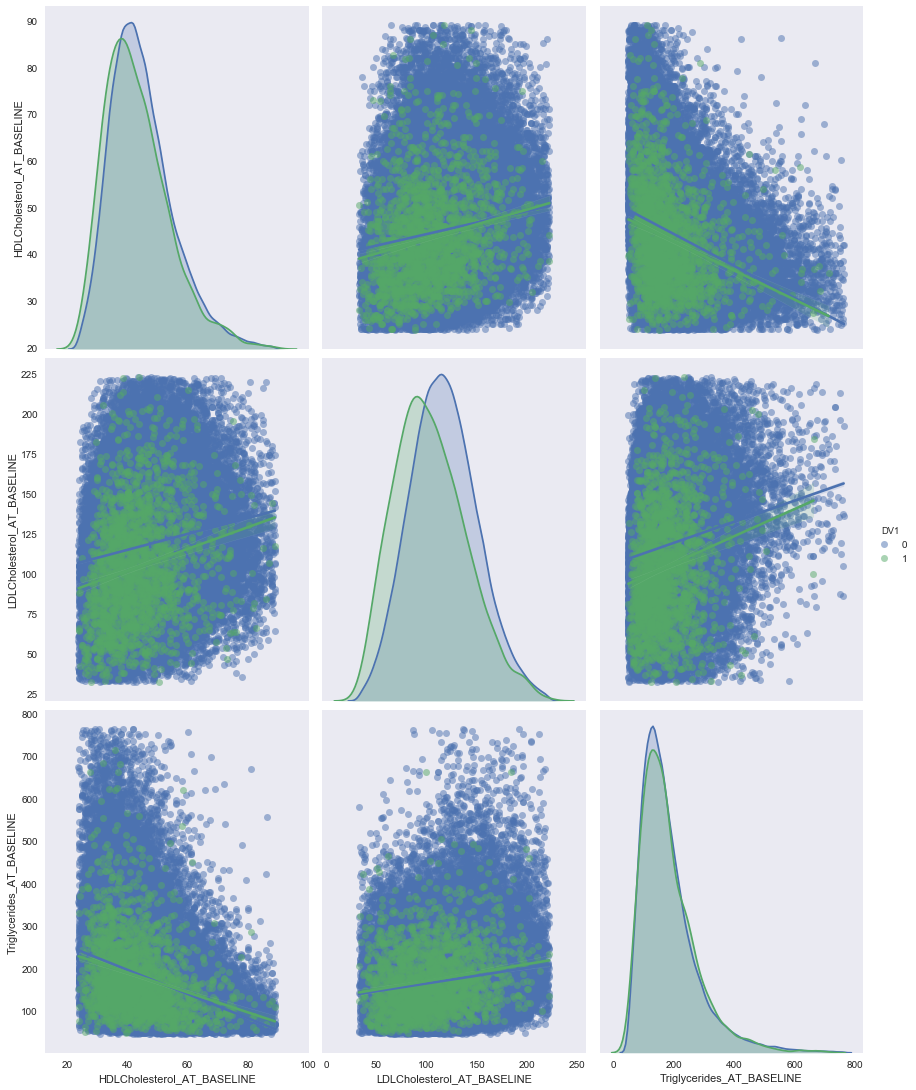

In [78]:
## pairplot Dyslipidemia related variables
sns.pairplot(df[["HDLCholesterol_AT_BASELINE", "LDLCholesterol_AT_BASELINE","Triglycerides_AT_BASELINE", "DV1" ]],
            hue="DV1",  kind="reg", height=5, aspect=0.8,
             plot_kws={'scatter_kws': {'alpha': 0.5}})
plt.show()

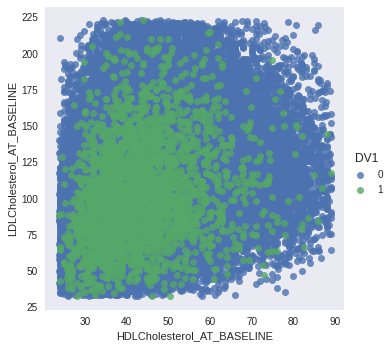

In [93]:
sns.lmplot(x="HDLCholesterol_AT_BASELINE", y = "LDLCholesterol_AT_BASELINE", hue="DV1", data=df, fit_reg=False)
plt.show()

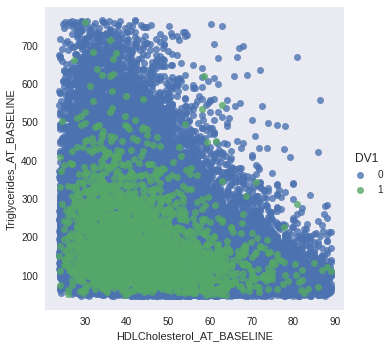

In [94]:
sns.lmplot(x="HDLCholesterol_AT_BASELINE", y = "Triglycerides_AT_BASELINE", hue="DV1", data=df, fit_reg=False)
plt.show()

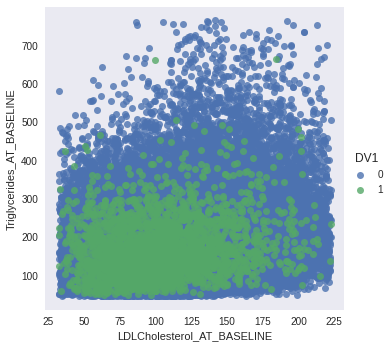

In [95]:
sns.lmplot(x="LDLCholesterol_AT_BASELINE", y = "Triglycerides_AT_BASELINE", hue="DV1", data=df, fit_reg=False)
plt.show()

Key insights:  



## long duration of diabetes
Not relevent in this case

## cystatin-C levels and creatinine evaluating renal function
 
* Measurement of cystatin-C levels is more specific than creatinine for evaluating 
    renal function, but it is more costly  
Creatinine_B_AT_BASELINE  
vs:    
Urea_B_AT_BASELINE                0.507868  
DV1                               0.341259  
PTH_AT_BASELINE                   0.338543  
Hemoglobin_AT_BASELINE            0.195784  
K_Potassium_B_AT_BASELINE         0.162324  
Na_Sodium_B_AT_BASELINE           0.140787  
AGE_AT_SDATE                      0.139477  
Ferritin_AT_BASELINE              0.130255  
Bilirubin_Total_AT_BASELINE       0.115996  
SE_TROMBOPHILIA                  -0.240278  
SE_DEMENTIA                      -0.239197  
SE_HYPERTENSION                  -0.208201  
SE_ART_SCLE_GEN                  -0.194581  
HDLCholesterol_AT_BASELINE       -0.162298  
SE_ISCHEMIC_MI                   -0.148503  
SE_IBD                           -0.134127  
SE_CVA_TIA                       -0.115234  
BMI_AT_BASELINE                  -0.109666  

In [96]:
# corrMatrix.Creatinine_B_AT_BASELINE.sort_values(ascending=True)

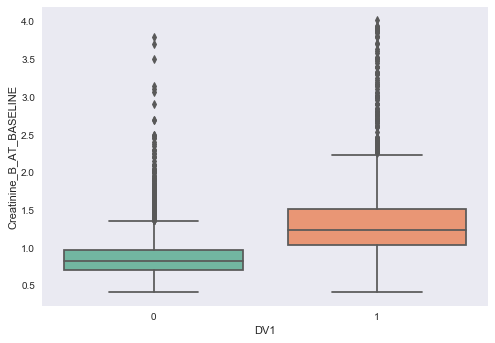

In [50]:
sns.boxplot(x='DV1', y='Creatinine_B_AT_BASELINE', data=df, palette="Set2")
plt.show()

In [51]:
# get ANOVA table as R like output
# Ordinary Least Squares (OLS) model
model = ols('Creatinine_B_AT_BASELINE ~ C(DV1)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq       df             F  PR(>F)
C(DV1)     542.633592      1.0  12909.260047     0.0
Residual  4157.753139  98913.0           NaN     NaN

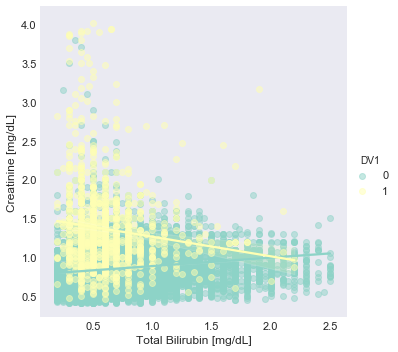

In [36]:
sns.lmplot(x="Bilirubin_Total_AT_BASELINE", y = "Creatinine_B_AT_BASELINE", hue="DV1", data=df,
          scatter_kws={'alpha':0.5}, palette="Set3")
plt.ylabel("Creatinine [mg/dL]")
plt.xlabel("Total Bilirubin [mg/dL]")
plt.show()

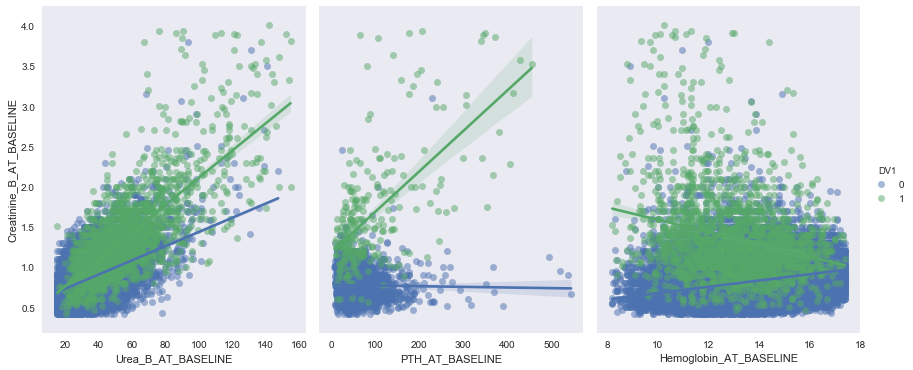

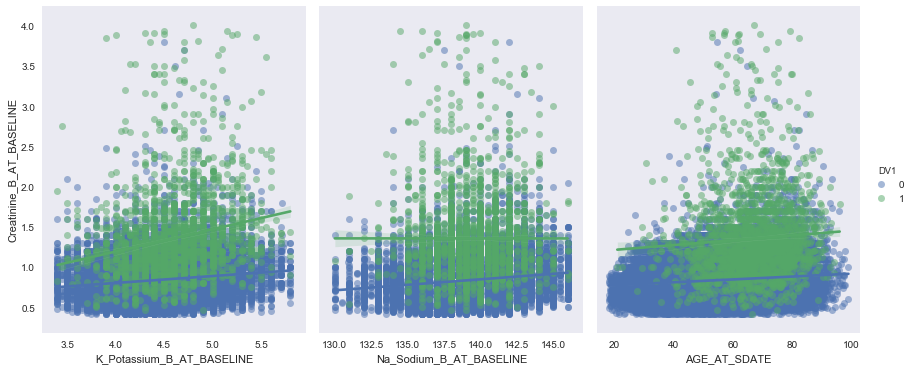

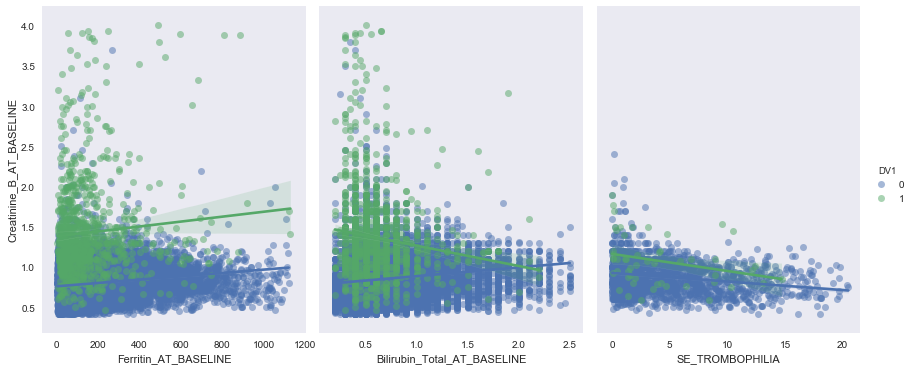

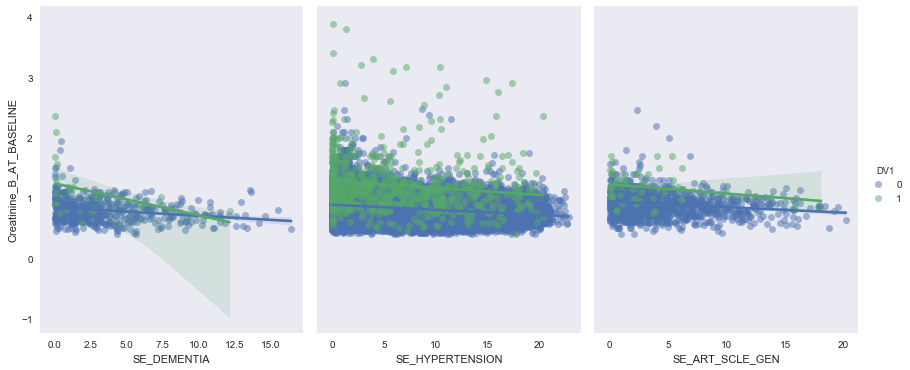

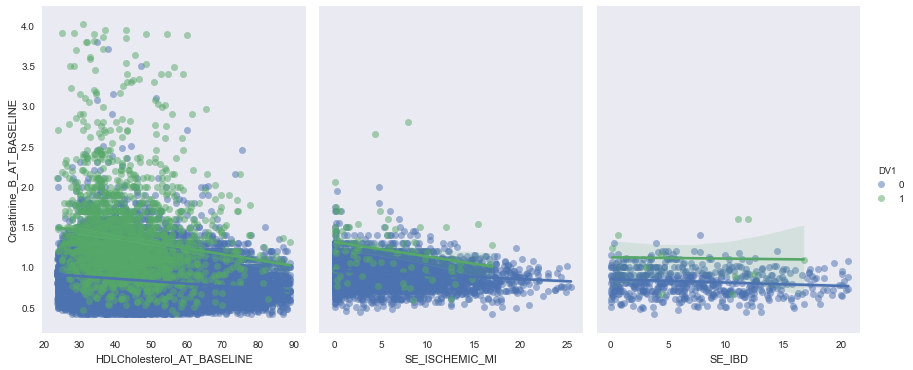

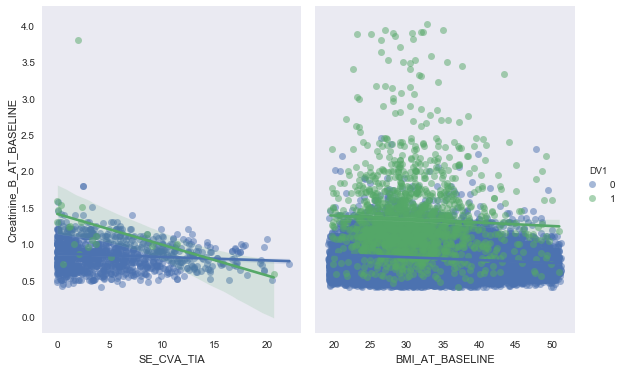

In [79]:
## Creatinine
Creatinine_pair_names = ["Creatinine_B_AT_BASELINE",
                         "Urea_B_AT_BASELINE","PTH_AT_BASELINE","Hemoglobin_AT_BASELINE",
                         "K_Potassium_B_AT_BASELINE","Na_Sodium_B_AT_BASELINE","AGE_AT_SDATE",
                         "Ferritin_AT_BASELINE","Bilirubin_Total_AT_BASELINE","SE_TROMBOPHILIA",
                         "SE_DEMENTIA","SE_HYPERTENSION","SE_ART_SCLE_GEN",
                         "HDLCholesterol_AT_BASELINE","SE_ISCHEMIC_MI","SE_IBD",
                         "SE_CVA_TIA","BMI_AT_BASELINE",
                         "DV1"]

sns.pairplot(df[Creatinine_pair_names],y_vars=["Creatinine_B_AT_BASELINE"],
                  x_vars=["Urea_B_AT_BASELINE","PTH_AT_BASELINE","Hemoglobin_AT_BASELINE"],
             hue='DV1', height=5, aspect=0.8, plot_kws={'scatter_kws': {'alpha': 0.5}}, kind="reg"
            )
sns.pairplot(df[Creatinine_pair_names],y_vars=['Creatinine_B_AT_BASELINE'],
                  x_vars=["K_Potassium_B_AT_BASELINE","Na_Sodium_B_AT_BASELINE","AGE_AT_SDATE"],
             hue='DV1', height=5, aspect=0.8, plot_kws={'scatter_kws': {'alpha': 0.5}}, kind="reg")
sns.pairplot(df[Creatinine_pair_names],y_vars=['Creatinine_B_AT_BASELINE'],
                  x_vars=["Ferritin_AT_BASELINE","Bilirubin_Total_AT_BASELINE","SE_TROMBOPHILIA"],
             hue='DV1', height=5, aspect=0.8, plot_kws={'scatter_kws': {'alpha': 0.5}}, kind="reg")
sns.pairplot(df[Creatinine_pair_names],y_vars=['Creatinine_B_AT_BASELINE'],
                  x_vars=["SE_DEMENTIA","SE_HYPERTENSION","SE_ART_SCLE_GEN"],
             hue='DV1', height=5, aspect=0.8, plot_kws={'scatter_kws': {'alpha': 0.5}}, kind="reg")
sns.pairplot(df[Creatinine_pair_names],y_vars=['Creatinine_B_AT_BASELINE'],
                  x_vars=["HDLCholesterol_AT_BASELINE","SE_ISCHEMIC_MI","SE_IBD"],
             hue='DV1', height=5, aspect=0.8, plot_kws={'scatter_kws': {'alpha': 0.5}}, kind="reg")
sns.pairplot(df[Creatinine_pair_names],y_vars=['Creatinine_B_AT_BASELINE'],
                  x_vars=["SE_CVA_TIA","BMI_AT_BASELINE"],
             hue='DV1', height=5, aspect=0.8, plot_kws={'scatter_kws': {'alpha': 0.5}}, kind="reg")
plt.show()

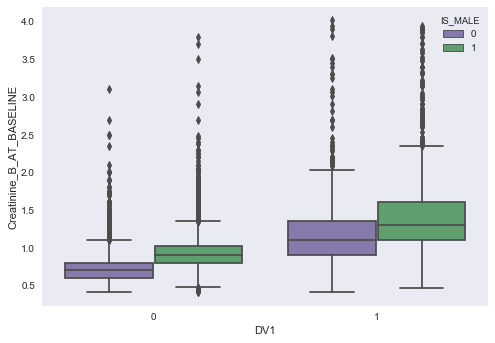

In [59]:
# DV_1 based on Creatinine_B_AT_BASELINE level and divided by sex

# df['Creatinine_B_AT_BASELINE'].count() # There are 123659 values
sns.boxplot(x="DV1", y="Creatinine_B_AT_BASELINE",
            hue="IS_MALE", palette=["m", "g"],
            data=df)
plt.show()

Key insights:  


## SE and IE columns
  
'IS_HYPERTENSION', 'SE_HYPERTENSION','IS_ISCHEMIC_MI', 'SE_ISCHEMIC_MI', 'IS_CVA_TIA', 'SE_CVA_TIA',IS_DEMENTIA', 'SE_DEMENTIA', 'IS_ART_SCLE_GEN', 'SE_ART_SCLE_GEN',
'IS_TROMBOPHILIA', 'SE_TROMBOPHILIA', 'IS_IBD', 'SE_IBD'

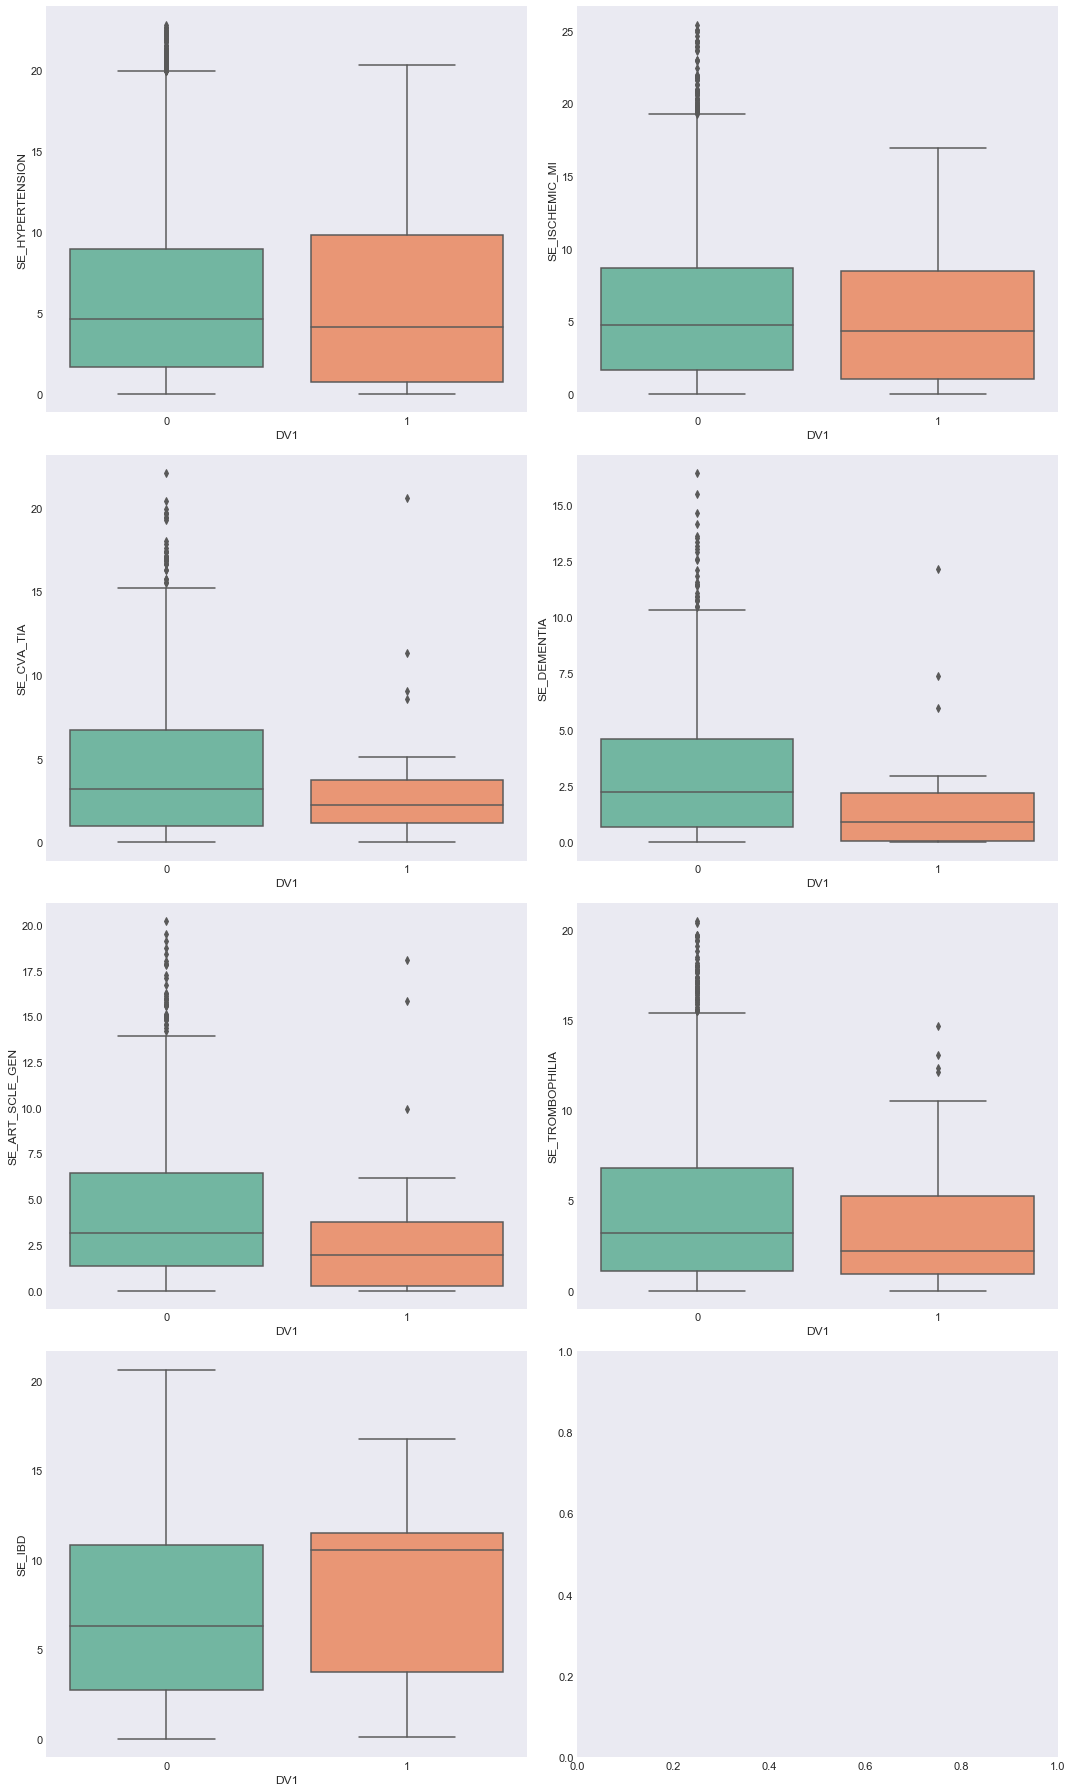

In [17]:
## SE and IE plot
fig, ((ax1,ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4,2, figsize=(15,25))
sns.boxplot(x='DV1', y='SE_HYPERTENSION', data=df, palette="Set2", ax=ax1)
sns.boxplot(x='DV1', y='SE_ISCHEMIC_MI', data=df, palette="Set2", ax=ax2)
sns.boxplot(x='DV1', y='SE_CVA_TIA', data=df, palette="Set2", ax=ax3)
sns.boxplot(x='DV1', y='SE_DEMENTIA', data=df, palette="Set2", ax=ax4)
sns.boxplot(x='DV1', y='SE_ART_SCLE_GEN', data=df, palette="Set2", ax=ax5)
sns.boxplot(x='DV1', y='SE_TROMBOPHILIA', data=df, palette="Set2", ax=ax6)
sns.boxplot(x='DV1', y='SE_IBD', data=df, palette="Set2", ax=ax7)
plt.tight_layout()
plt.show()

Key insights:  
Creating new categorical column for each clinical variable containing both SE and IS data.
How to divide each column: by quantile of 0 patients 


### Other
Albumin_B_AT_BASELINE, RBCRed_Blood_Cells_AT_BASELINE, Hemoglobin_AT_BASELINE, CaCalcium_B_AT_BASELINE

## Categorical data

### Sex

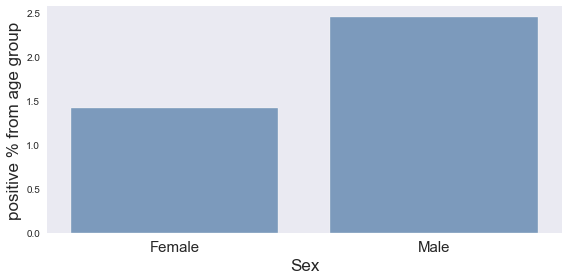

In [29]:
#Age group to DV1,2 and 3 relationship
fig, ax1 = plt.subplots(figsize=(8,4))
# Calaculating precentage of positive patiantes from age group and plot
a1= df.groupby("IS_MALE").DV1.sum()
b = df.IS_MALE.value_counts()
c1=(a1.sort_values()/(b.sort_values()))*100
ax1.bar(c1.index, c1.values, color=(0.2, 0.4, 0.6, 0.6))
ax1.set_xlabel("Sex",fontsize=(17))
ax1.set_ylabel("positive % from age group",fontsize=(17))
#ax1.set_title("DV1")
ax1.set_xticks([0,1])
ax1.set_xticklabels(["Female", "Male"], fontsize=(15))

plt.tight_layout()
plt.show()

###  Age group

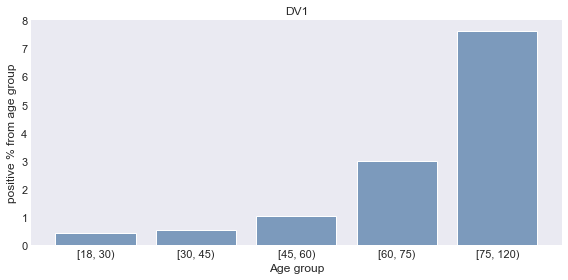

In [43]:
#Age group to DV1,2 and 3 relationship
fig, ax1 = plt.subplots(figsize=(8,4))
# Calaculating precentage of positive patiantes from age group and plot
a1= df.groupby("AGE_GROUP").DV1.sum()
b = df.AGE_GROUP.value_counts()
c1=(a1.sort_values()/(b.sort_values()))*100
ax1.bar(c1.index, c1.values, color=(0.2, 0.4, 0.6, 0.6))
ax1.set_xlabel("Age group")
ax1.set_ylabel("positive % from age group")
ax1.set_title("DV1")
plt.tight_layout()
plt.show()

Key insights:  


### Migzar (sector)

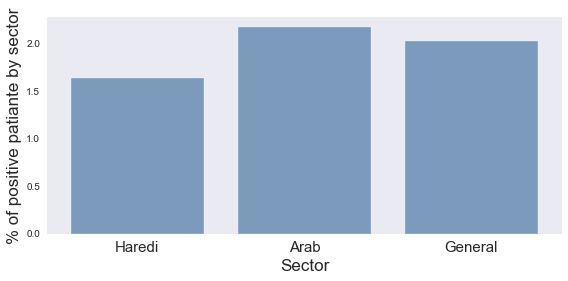

In [37]:
## plot MIGZAR
fig, ax1 = plt.subplots(figsize=(8,4))
# Calaculating precentage of positive patiantes from age group and plot
a1= df.groupby("MIGZAR").DV1.sum()
b = df.MIGZAR.value_counts()
c1=(a1.sort_values()/(b.sort_values()))*100
ax1.bar(c1.index, c1.values, color=(0.2, 0.4, 0.6, 0.6))
ax1.set_xlabel("Sector", fontsize=(17))
ax1.set_ylabel("% of positive patiante by sector", fontsize=(17))
ax1.set_xticks( [0,1,2])
ax1.set_xticklabels( ["Haredi", "Arab", "General"],fontsize=(15))

#ax1.set_title("DV1")
plt.tight_layout()
plt.show()

Key insights:  


### Social economic group

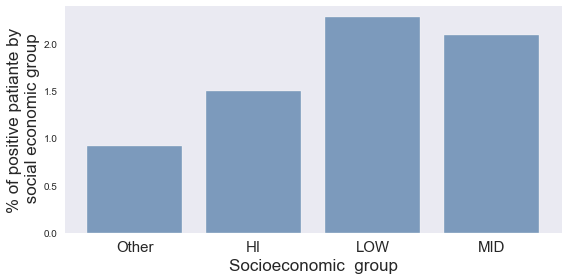

In [41]:
## Plot Social economic group
fig, ax1 = plt.subplots(figsize=(8,4))
# Calaculating precentage of positive patiantes from SES_GROUP and plot
a1= df.groupby("SES_GROUP").DV1.sum()
b = df.SES_GROUP.value_counts()
c1=(a1.sort_values()/(b.sort_values()))*100
ax1.bar(c1.index, c1.values, color=(0.2, 0.4, 0.6, 0.6))
ax1.set_xlabel("Socioeconomic  group", fontsize = (17))
ax1.set_ylabel("% of positive patiante by\n social economic group", fontsize = (17))
ax1.set_xticks( [0,1,2,3])
ax1.set_xticklabels( ["Other", "HI", "LOW", "MID"],fontsize=(15))
#ax1.set_title("DV1")
plt.tight_layout()
plt.show()

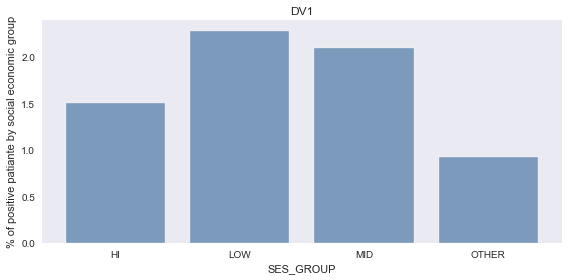

In [38]:
## Plot Social economic group
fig, ax1 = plt.subplots(figsize=(8,4))
# Calaculating precentage of positive patiantes from SES_GROUP and plot
a1= df.groupby("SES_GROUP").DV1.sum()
b = df.SES_GROUP.value_counts()
c1=(a1/b)*100
ax1.bar(c1.index, c1.values, color=(0.2, 0.4, 0.6, 0.6))
ax1.set_xlabel("SES_GROUP")
ax1.set_ylabel("% of positive patiante by social economic group")
ax1.set_title("DV1")
plt.tight_layout()
plt.show()